In [36]:
import pandas as pd  # Manipulation des données
import numpy as np   # Calculs mathématiques
import matplotlib.pyplot as plt  # Visualisation
import seaborn as sns  # Visualisation avancée

# Afficher les graphiques directement dans le notebook
%matplotlib inline

In [52]:
df = pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv", encoding='latin-1')
df_copy = df.copy()
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [3]:
df.groupby('Department')['Performance_Score'].agg(['mean' ,'std', 'min', 'max', 'count']).round(2)

,mean,std,min,max,count
Department,,,,,
Customer Support,3.00,1.41,1,5,11116
Engineering,3.02,1.42,1,5,10956
Finance,2.98,1.41,1,5,11200
HR,3.00,1.41,1,5,10960
IT,3.00,1.42,1,5,11131
Legal,2.98,1.42,1,5,11118
Marketing,2.98,1.41,1,5,11216
Operations,3.01,1.41,1,5,11181
Sales,2.99,1.41,1,5,11122


In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


variables = [
    'Work_Hours_Per_Week',
    'Overtime_Hours',
    'Projects_Handled',
    'Performance_Score',
    'Remote_Work_Frequency',
    'Team_Size',
    'Monthly_Salary'
]

results = []

for var in variables:
    model = ols(f'{var} ~ C(Department)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table['PR(>F)'].iloc[0]
    results.append({'Variable': var, 'p-value': p_value})

anova_results = pd.DataFrame(results).sort_values(by='p-value')
print(anova_results)

                Variable   p-value
2       Projects_Handled  0.086352
1         Overtime_Hours  0.137032
6         Monthly_Salary  0.450007
3      Performance_Score  0.467323
5              Team_Size  0.555197
4  Remote_Work_Frequency  0.614068
0    Work_Hours_Per_Week  0.801844


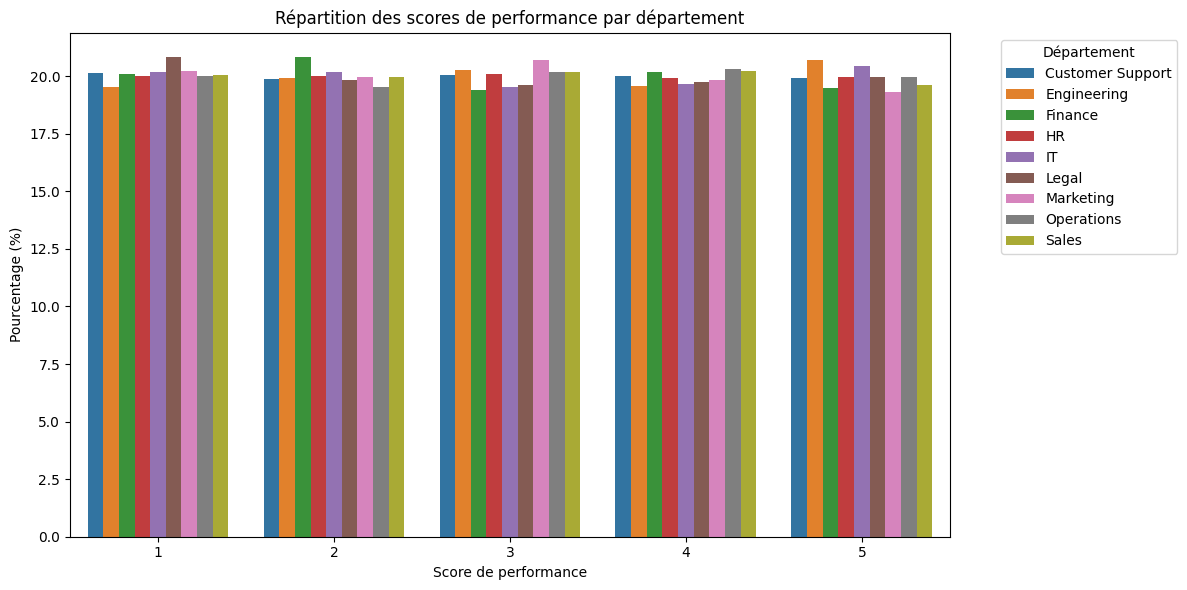

In [5]:
grouped = df.groupby(['Department', 'Performance_Score']).size().reset_index(name='Count')
total_by_dep = df.groupby('Department').size().reset_index(name='Total')
grouped = grouped.merge(total_by_dep, on='Department')
grouped['Percentage'] = grouped['Count'] / grouped['Total'] * 100


plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped,
    x='Performance_Score',
    y='Percentage',
    hue='Department'
)
plt.title("Répartition des scores de performance par département")
plt.ylabel("Pourcentage (%)")
plt.xlabel("Score de performance")
plt.legend(title="Département", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [39]:
# Créer un dictionnaire de correspondance pour Education_Level
education_mapping = {
    'High School': 1,
    'Bachelor': 2,
    'Master': 3,
    'PhD': 4
}

# Créer un dictionnaire de correspondance pour Department
department_mapping = { 
    'Customer Support': 1,
    'Engineering': 2,
    'Finance': 3,
    'HR': 4,
    'IT': 5,
    'Legal': 6,
    'Marketing': 7,
    'Operations': 8,
    'Sales': 9
}

# Créer un dictionnaire de correspondance pour Job_Title
job_title_mapping = {
    'Analyst': 1,
    'Consultant': 2,
    'Developer': 3,
    'Engineer': 4,
    'Manager': 5,
    'Specialist': 6,
    'Technician': 7
}

# Appliquer ce mappage pour créer une nouvelle colonne 'Department_ID'
#df['Department_ID'] = df['Department'].map(department_mapping)

# Appliquer ce mappage pour créer une nouvelle colonne 'Education_Level_ID'
#df['Education_Level_ID'] = df['Education_Level'].map(education_mapping)




df.head()


,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


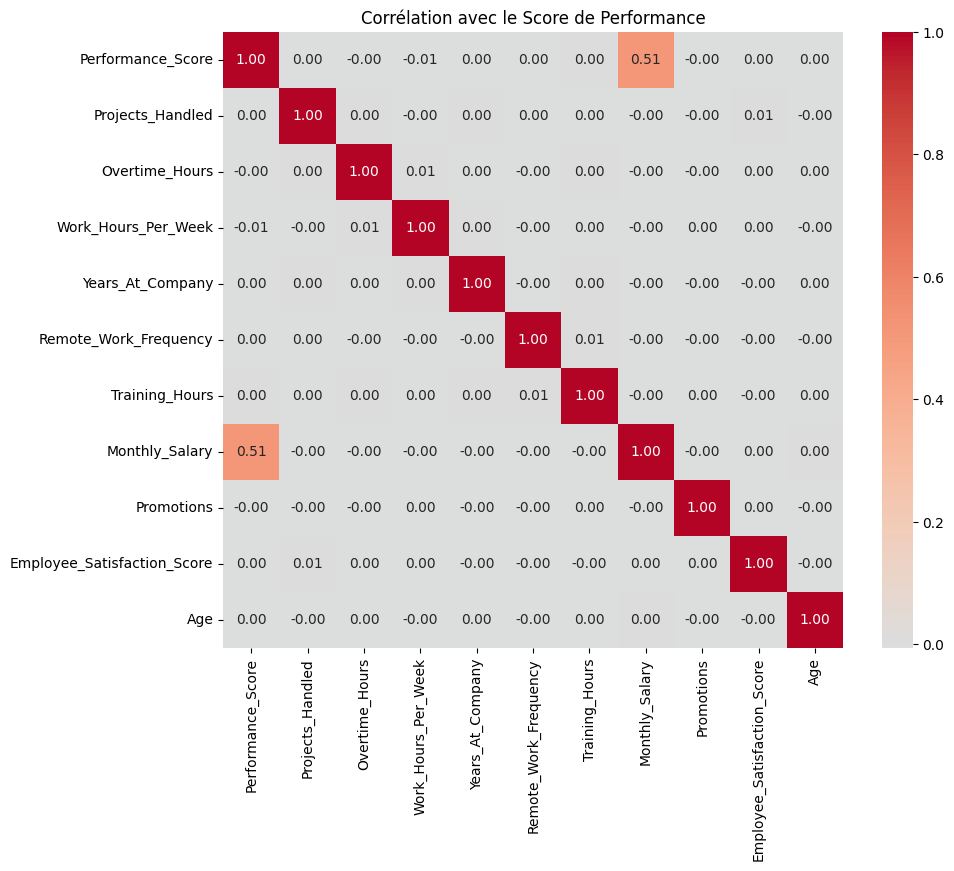

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des variables quantitatives à tester
variables_corr = [
    'Performance_Score',
    'Projects_Handled',
    'Overtime_Hours',
    'Work_Hours_Per_Week',
    'Years_At_Company',
    'Remote_Work_Frequency',
    'Training_Hours',
    'Monthly_Salary',
    'Promotions',
    'Employee_Satisfaction_Score',
    'Age'
]

# On garde uniquement les colonnes utiles
df_corr = df[variables_corr].dropna()

# Calcul de la matrice de corrélation (méthode Pearson)
correlation_matrix = df_corr.corr(method='pearson')

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Corrélation avec le Score de Performance')
plt.show()


In [20]:
import pandas as pd
import statsmodels.api as sm

# Supposons que ton DataFrame s'appelle df

# Liste des variables explicatives possibles (hors 'Performance_Score')
# On ne garde ici que les colonnes numériques ou que tu pourrais vouloir tester
variables_possibles = [
    'Monthly_Salary',
    'Work_Hours_Per_Week',
    'Projects_Handled',
    'Overtime_Hours',
    'Sick_Days',
    'Remote_Work_Frequency',
    'Team_Size',
    'Training_Hours',
    'Promotions',
    'Employee_Satisfaction_Score',
    'Years_At_Company',
    'Age'
]

# On retire les lignes avec des NaN dans les variables utilisées
df_clean = df.dropna(subset=variables_possibles + ['Performance_Score'])

# Variables explicatives (X) et cible (y)
X = df_clean[variables_possibles]
y = df_clean['Performance_Score']

# Ajout de la constante pour l'interception (nécessaire pour statsmodels)
X = sm.add_constant(X)

# Régression linéaire multiple
model = sm.OLS(y, X).fit()

# Résumé des résultats
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Performance_Score   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     2931.
Date:                Wed, 23 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:43:28   Log-Likelihood:            -1.6152e+05
No. Observations:              100000   AIC:                         3.231e+05
Df Residuals:                   99987   BIC:                         3.232e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [21]:
import statsmodels.api as sm

results = {}

for dept in df['Department'].unique():
    subset = df[df['Department'] == dept]
    X = subset[['Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled', 'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size', 'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score', 'Years_At_Company', 'Age']]
    y = subset["Performance_Score"]

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    results[dept] = model

for dept, model in results.items():
    print(f"{dept} → R² : {model.rsquared:.3f}")


for dept, model in results.items():
    pvalues = model.pvalues
    sig_vars = pvalues[pvalues < 0.05].index.tolist()
    sig_vars = [var for var in sig_vars if var != 'const']  # on enlève l'intercept
    print(f"{dept} → Variables significatives : {sig_vars}")


IT → R² : 0.267
Finance → R² : 0.256
Customer Support → R² : 0.268
Engineering → R² : 0.256
Marketing → R² : 0.256
HR → R² : 0.257
Operations → R² : 0.259
Sales → R² : 0.261
Legal → R² : 0.267
IT → Variables significatives : ['Monthly_Salary', 'Years_At_Company']
Finance → Variables significatives : ['Monthly_Salary', 'Team_Size']
Customer Support → Variables significatives : ['Monthly_Salary', 'Sick_Days']
Engineering → Variables significatives : ['Monthly_Salary']
Marketing → Variables significatives : ['Monthly_Salary']
HR → Variables significatives : ['Monthly_Salary']
Operations → Variables significatives : ['Monthly_Salary']
Sales → Variables significatives : ['Monthly_Salary']
Legal → Variables significatives : ['Monthly_Salary', 'Sick_Days']


In [10]:
quant_vars = ['Performance_Score', 'Projects_Handled', 'Overtime_Hours', 'Work_Hours_Per_Week', 'Years_At_Company', 'Remote_Work_Frequency', 'Training_Hours', 'Monthly_Salary', 'Promotions', 'Employee_Satisfaction_Score', 'Age']

# Calcul de la moyenne et de la variance
tableau_comparatif = df.groupby('Department')[quant_vars].agg(['mean', 'var']).round(2)

# Affichage
print(tableau_comparatif)


                 Performance_Score       Projects_Handled          \
                              mean   var             mean     var   
Department                                                          
Customer Support              3.00  2.00            24.43  209.62   
Engineering                   3.02  2.00            24.42  207.74   
Finance                       2.98  1.99            24.41  209.22   
HR                            3.00  2.00            24.20  208.81   
IT                            3.00  2.02            24.54  212.48   
Legal                         2.98  2.03            24.21  207.36   
Marketing                     2.98  1.98            24.66  210.69   
Operations                    3.01  2.00            24.30  207.72   
Sales                         2.99  1.99            24.71  210.53   

                 Overtime_Hours        Work_Hours_Per_Week         \
                           mean    var                mean    var   
Department                       

In [11]:
# Calcul des fréquences et des pourcentages pour chaque variable qualitative
for col in ['Job_Title', 'Gender', 'Education_Level', 'Resigned']:
    print(f"Fréquences pour {col}:")
    print(df[col].value_counts())
    print(f"Pourcentages pour {col}:")
    print(df[col].value_counts(normalize=True) * 100)
    print("-" * 50)


Fréquences pour Job_Title:
Job_Title
Specialist    14507
Manager       14325
Technician    14285
Analyst       14261
Engineer      14217
Consultant    14210
Developer     14195
Name: count, dtype: int64
Pourcentages pour Job_Title:
Job_Title
Specialist    14.507
Manager       14.325
Technician    14.285
Analyst       14.261
Engineer      14.217
Consultant    14.210
Developer     14.195
Name: proportion, dtype: float64
--------------------------------------------------
Fréquences pour Gender:
Gender
Male      48031
Female    48001
Other      3968
Name: count, dtype: int64
Pourcentages pour Gender:
Gender
Male      48.031
Female    48.001
Other      3.968
Name: proportion, dtype: float64
--------------------------------------------------
Fréquences pour Education_Level:
Education_Level
Bachelor       50041
High School    30004
Master         14904
PhD             5051
Name: count, dtype: int64
Pourcentages pour Education_Level:
Education_Level
Bachelor       50.041
High School    30.004


In [12]:
# Fréquences par département pour 'gender'
print("Distribution du 'gender' par département:")
print(pd.crosstab(df['Department'], df['Gender'], margins=True))


Distribution du 'gender' par département:
Gender            Female   Male  Other     All
Department                                    
Customer Support    5240   5486    390   11116
Engineering         5229   5293    434   10956
Finance             5381   5349    470   11200
HR                  5260   5221    479   10960
IT                  5315   5366    450   11131
Legal               5401   5292    425   11118
Marketing           5397   5383    436   11216
Operations          5398   5339    444   11181
Sales               5380   5302    440   11122
All                48001  48031   3968  100000


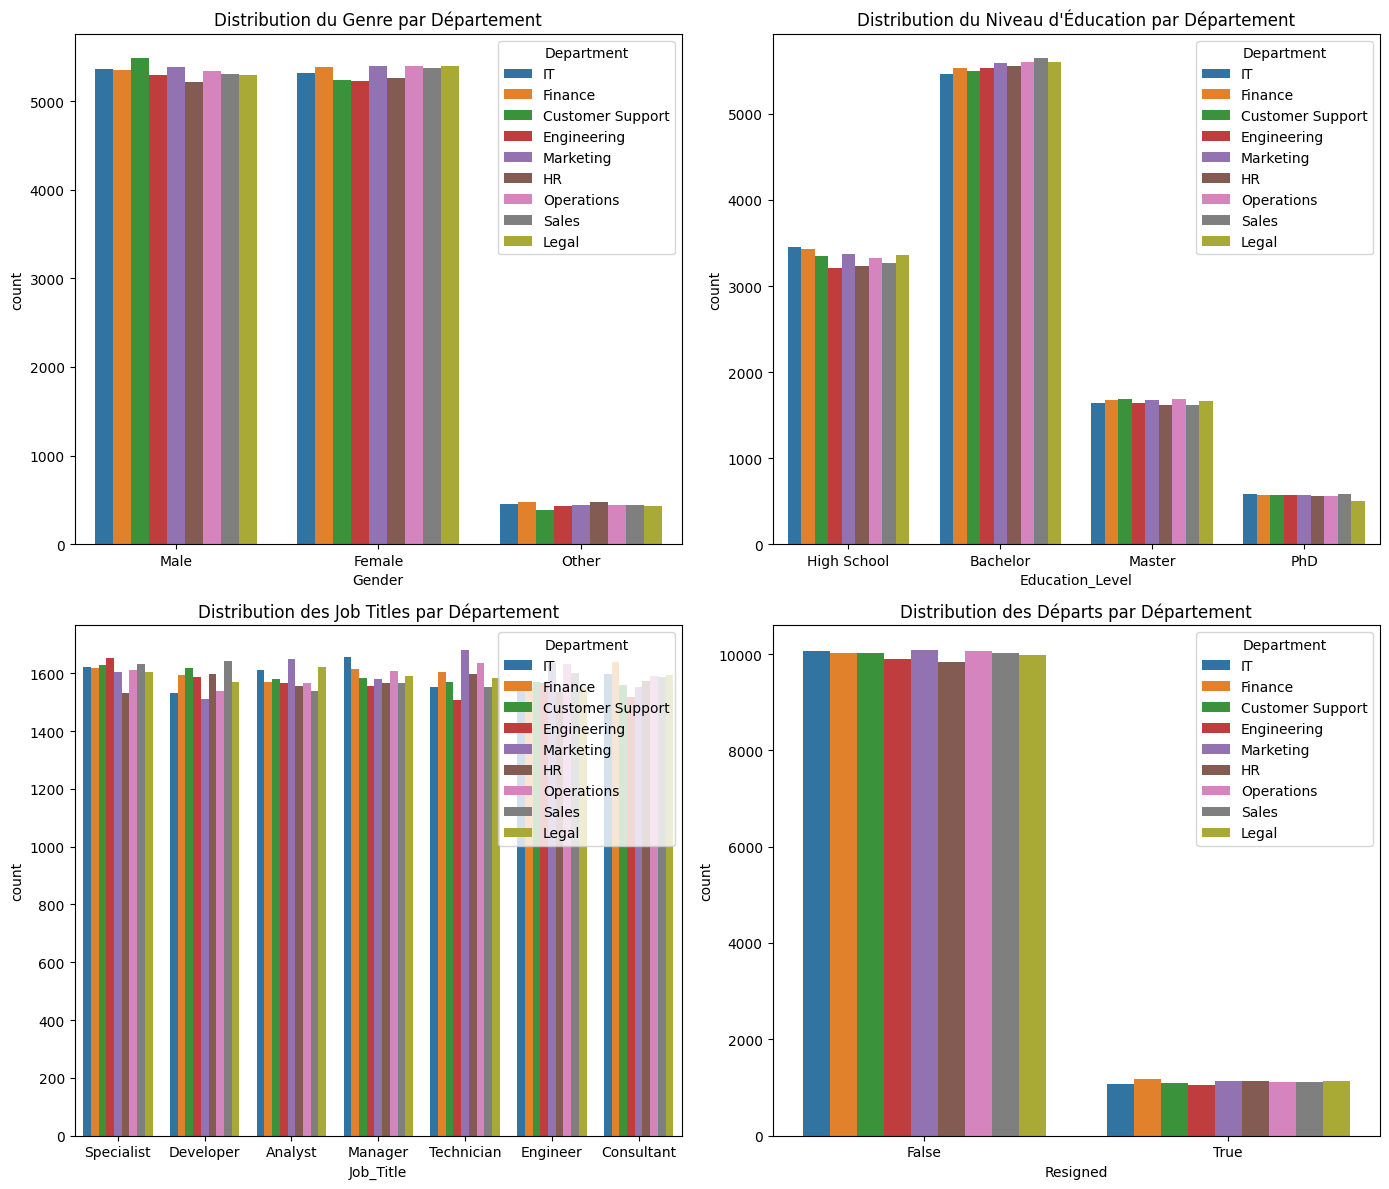

In [13]:
# Graphiques à barres pour chaque variable par département
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Gender par département
sns.countplot(data=df, x='Gender', hue='Department', ax=axes[0, 0])
axes[0, 0].set_title('Distribution du Genre par Département')

# Education Level par département
sns.countplot(data=df, x='Education_Level', hue='Department', ax=axes[0, 1])
axes[0, 1].set_title('Distribution du Niveau d\'Éducation par Département')

# Job Title par département
sns.countplot(data=df, x='Job_Title', hue='Department', ax=axes[1, 0])
axes[1, 0].set_title('Distribution des Job Titles par Département')

# Resigned par département
sns.countplot(data=df, x='Resigned', hue='Department', ax=axes[1, 1])
axes[1, 1].set_title('Distribution des Départs par Département')

plt.tight_layout()
plt.show()


In [19]:
from scipy.stats import chi2_contingency

variables = ['Job_Title', 'Gender', 'Education_Level', 'Resigned', 'Department']

# Test Chi² entre chaque variable et 'Performance_Score'
for var in variables:
    contingency_table = pd.crosstab(df[var], df['Performance_Score'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Test Chi-carré entre '{var}' et 'Performance_Score':")
    print(f"Chi2: {chi2}, p-value: {p}\n")

Test Chi-carré entre 'Job_Title' et 'Performance_Score':
Chi2: 22.589118431311782, p-value: 0.544148420196565

Test Chi-carré entre 'Gender' et 'Performance_Score':
Chi2: 15.673410089379828, p-value: 0.047300419587846046

Test Chi-carré entre 'Education_Level' et 'Performance_Score':
Chi2: 20.016966963032157, p-value: 0.066765684931987

Test Chi-carré entre 'Resigned' et 'Performance_Score':
Chi2: 3.194619855030872, p-value: 0.525800370858567

Test Chi-carré entre 'Department' et 'Performance_Score':
Chi2: 29.840143671201673, p-value: 0.5762765037057908



In [17]:
# Variables à tester
variables_qualitatives = ['Job_Title', 'Gender', 'Education_Level', 'Resigned']

# Résultats stockés ici
results = []

# Boucle sur chaque département
for dept in df['Department'].unique():
    df_dept = df[df['Department'] == dept]
    
    for var in variables_qualitatives:
        # Table de contingence
        table = pd.crosstab(df_dept[var], df_dept['Performance_Score'])
        
        # Vérifie que la table est bien formée (au moins 2 lignes et 2 colonnes)
        if table.shape[0] > 1 and table.shape[1] > 1:
            chi2, p, dof, expected = chi2_contingency(table)
            results.append({
                'Department': dept,
                'Variable': var,
                'Chi2': chi2,
                'p-value': p,
                'Degrees_of_Freedom': dof
            })

# Résultats sous forme de DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='p-value'))


          Department         Variable       Chi2   p-value  Degrees_of_Freedom
23                HR         Resigned  10.560952  0.031968                   4
20                HR        Job_Title  37.966230  0.034950                  24
0                 IT        Job_Title  34.237134  0.080542                  24
25        Operations           Gender  12.940264  0.113922                   8
17         Marketing           Gender  12.637358  0.124951                   8
29             Sales           Gender  11.985834  0.151837                   8
7            Finance         Resigned   6.660361  0.154963                   4
12       Engineering        Job_Title  28.970407  0.221247                  24
35             Legal         Resigned   5.350905  0.253149                   4
16         Marketing        Job_Title  27.348517  0.288472                  24
34             Legal  Education_Level  14.187119  0.288919                  12
4            Finance        Job_Title  27.262047  0.

In [56]:
resigned_mapping = {False: 0, True: 1}
df['Resigned_ID'] = df['Resigned'].map(resigned_mapping)

df = pd.get_dummies(df, columns=['Gender'], prefix='Gender_')
gender_title_columns = [col for col in df.columns if col.startswith('Gender_')]
df[gender_title_columns] = df[gender_title_columns].astype(int)

df = pd.get_dummies(df, columns=['Job_Title'], prefix='JobTitle')
job_title_columns = [col for col in df.columns if col.startswith('JobTitle')]
df[job_title_columns] = df[job_title_columns].astype(int)

df.head()

,Employee_ID,Department,Age,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,...,JobTitle_Analyst,JobTitle_Consultant,JobTitle_Developer,JobTitle_Engineer,JobTitle_Manager,JobTitle_Specialist,JobTitle_Technician,Gender__Female,Gender__Male,Gender__Other
0,1,IT,55,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,...,0,0,0,0,0,1,0,0,1,0
1,2,Finance,29,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,...,0,0,1,0,0,0,0,0,1,0
2,3,Finance,55,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,...,0,0,0,0,0,1,0,0,1,0
3,4,Customer Support,48,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,...,1,0,0,0,0,0,0,1,0,0
4,5,Engineering,36,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,...,1,0,0,0,0,0,0,1,0,0


In [55]:
import pandas as pd
import statsmodels.api as sm

# Dictionnaire des variables explicatives par département
variables_by_dept = {
    'IT': ['Monthly_Salary', 'Years_At_Company'],
    'Finance': ['Monthly_Salary', 'Team_Size'],
    'Customer Support': ['Monthly_Salary', 'Sick_Days'],
    'Engineering': ['Monthly_Salary'],
    'Marketing': ['Monthly_Salary'],
    'HR': ['Monthly_Salary', 'JobTitle_Analyst', 'JobTitle_Consultant', 'JobTitle_Developer', 'JobTitle_Engineer', 'JobTitle_Manager', 'JobTitle_Specialist', 'JobTitle_Technician', 'Resigned_ID'],
    'Operations': ['Monthly_Salary'],
    'Sales': ['Monthly_Salary'],
    'Legal': ['Monthly_Salary', 'Sick_Days']
}

# Dictionnaire pour stocker les R² par variable et par département
r_squared_by_variable = {}

for dept, variables in variables_by_dept.items():
    df_dept = df[df['Department'] == dept].dropna(subset=variables + ['Performance_Score'])
    r_squared_by_variable[dept] = {}

    for var in variables:
        X = df_dept[[var]]
        X = pd.get_dummies(X, drop_first=True)  # encodage si variable catégorielle
        X = sm.add_constant(X)
        y = df_dept['Performance_Score']
        
        model = sm.OLS(y, X).fit()
        r_squared_by_variable[dept][var] = round(model.rsquared, 3)  # R² arrondi à 3 décimales

# Affichage
for dept, vars_r2 in r_squared_by_variable.items():
    print(f"\n{dept}")
    for var, r2 in vars_r2.items():
        print(f"  {var} : R² = {r2}")



IT
  Monthly_Salary : R² = 0.266
  Years_At_Company : R² = 0.0

Finance
  Monthly_Salary : R² = 0.255
  Team_Size : R² = 0.0

Customer Support
  Monthly_Salary : R² = 0.267
  Sick_Days : R² = 0.0

Engineering
  Monthly_Salary : R² = 0.256

Marketing
  Monthly_Salary : R² = 0.255

HR
  Monthly_Salary : R² = 0.256
  JobTitle_Analyst : R² = 0.0
  JobTitle_Consultant : R² = 0.001
  JobTitle_Developer : R² = 0.0
  JobTitle_Engineer : R² = 0.0
  JobTitle_Manager : R² = 0.0
  JobTitle_Specialist : R² = 0.0
  JobTitle_Technician : R² = 0.0
  Resigned_ID : R² = 0.0

Operations
  Monthly_Salary : R² = 0.259

Sales
  Monthly_Salary : R² = 0.26

Legal
  Monthly_Salary : R² = 0.266
  Sick_Days : R² = 0.0


In [33]:
# Sélectionner les données pour un département particulier
df_dept = df[df['Department'] == 'IT'][['Monthly_Salary', 'Years_At_Company']]

# Calculer la matrice de corrélation
correlation_matrix = df_dept.corr()

# Afficher la matrice de corrélation
print(correlation_matrix)


                  Monthly_Salary  Years_At_Company
Monthly_Salary          1.000000         -0.002261
Years_At_Company       -0.002261          1.000000


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sélectionner les variables explicatives (par exemple, IT)
df_dept = df[df['Department'] == 'IT'][['Monthly_Salary', 'Years_At_Company']]

# Ajouter une constante (pour l'ordonnée à l'origine)
X = sm.add_constant(df_dept)

# Calculer les VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Afficher les VIF
print(vif_data)


           Variable        VIF
0             const  25.072949
1    Monthly_Salary   1.000005
2  Years_At_Company   1.000005
